In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier

import pickle

In [24]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [19]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [21]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

### Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# In last 3 columns,Out of 5572 values very few are non null so
# Dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
404,ham,"Yep, the great loxahatchee xmas tree burning o..."
488,ham,Depends on quality. If you want the type i sen...
4343,ham,Hi:)did you asked to waheeda fathima about leave?
1323,ham,I thk 50 shd be ok he said plus minus 10.. Did...
3062,spam,"Hi babe its Jordan, how r u? Im home from abro..."


In [ ]:
# Since the columns names are not interpretable so
# Renaming columns name
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
3695,ham,I am in tirupur. call you da.
3667,ham,Thanks for loving me so. You rock
3784,ham,Let me know if you need anything else. Salad o...
2564,ham,"Under the sea, there lays a rock. In the rock,..."
4351,ham,Hows the pain dear?y r u smiling?


In [ ]:
# encoding
lencoder = LabelEncoder()
df['Target'] = lencoder.fit_transform(df['Target'])


In [ ]:
lencoder.inverse_transform([0,1])

array(['ham', 'spam'], dtype=object)

In [ ]:
# missing value
df.isna().sum()

Target    0
Text      0
dtype: int64

In [ ]:
# Checking duplicated value
df.duplicated().sum()

403

In [ ]:
# Removing duplicates
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

## E.D.A

In [ ]:
df.sample(5)

,Target,Text
257,0,Where are you lover ? I need you ...
4709,0,Ya i knw u vl giv..its ok thanks kano..anyway ...
2642,0,"They can try! They can get lost, in fact. Tee hee"
1383,0,Please reserve ticket on saturday eve from che...
2113,0,"Yeah, don't go to bed, I'll be back before mid..."


In [ ]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

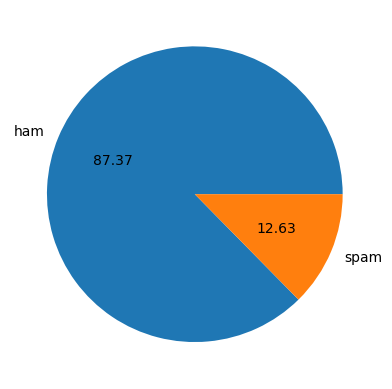

In [ ]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

#### In above pie chart you can see around 87 % text is ham and around 12 % text is spam
#### Here the data is imbalanced

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['num_characters']=df['Text'].apply(len)
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sents']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(5)

,Target,Text,num_characters,num_words,num_sents
4500,0,So wat's da decision?,21,6,1
3562,1,Auction round 4. The highest bid is now å£54. ...,133,36,5
3203,0,She's good. How are you. Where r u working now,46,13,3
1277,0,Dont put your phone on silent mode ok,37,8,1
5404,0,Pls give her prometazine syrup. 5mls then &lt...,69,19,2


In [ ]:
df[['num_characters','num_words','num_sents']].describe()

,num_characters,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# For ham messages
df[df['Target']==0][['num_characters','num_words','num_sents']].describe()

,num_characters,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# For spam messages
df[df['Target']==1][['num_characters','num_words','num_sents']].describe()

,num_characters,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_words', ylabel='Count'>

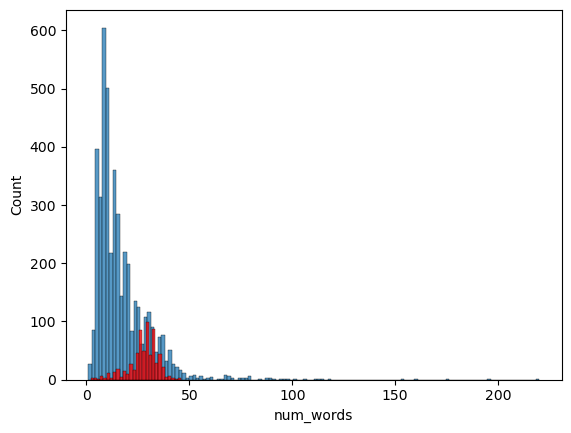

In [ ]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

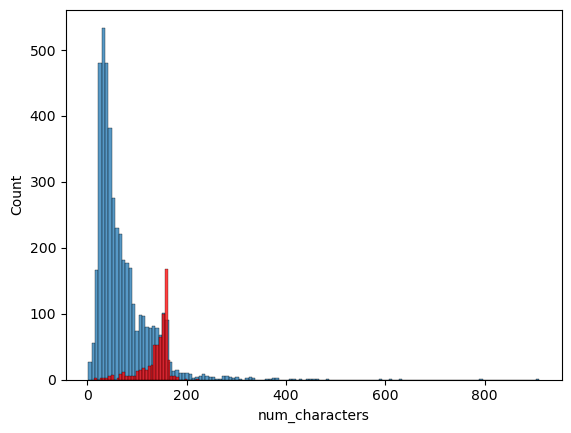

In [ ]:
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_sents', ylabel='Count'>

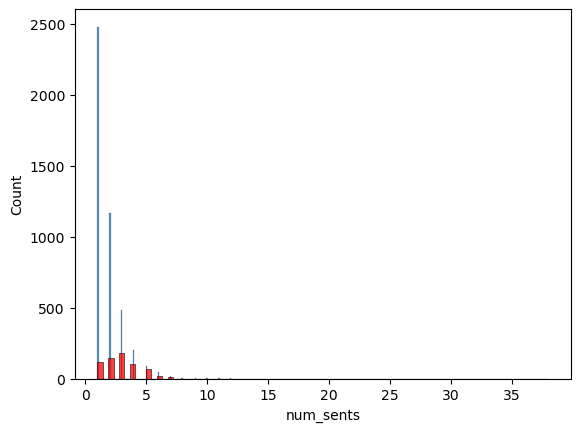

In [ ]:
sns.histplot(df[df['Target']==0]['num_sents'])
sns.histplot(df[df['Target']==1]['num_sents'],color='red')

###
In the above histograph, you can see average number of characters,words,sentence
in spam message is more than that of ham message

<Axes: >

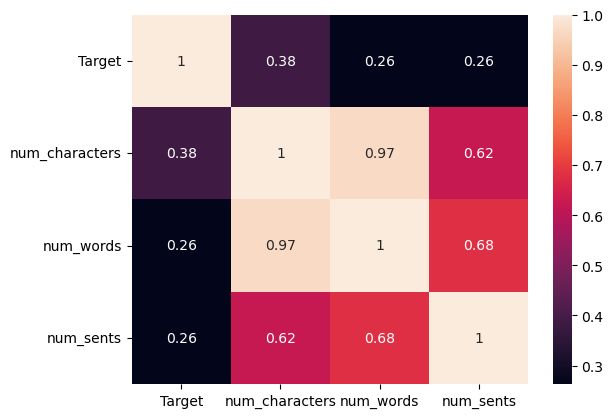

In [ ]:
sns.heatmap(df[['Target','num_characters','num_words','num_sents']].corr(),annot=True)

### 
Here the correlation of number of words with number of sentence and characters is high so we will be considering only number of words.

### Text preprocessing

In [ ]:
ps=PorterStemmer()
ps.stem('climbing')

'climb'

In [ ]:
def transform_text(Text):
    Text=Text.lower()
    Text=nltk.word_tokenize(Text)
    
    y=[]
    for i in Text:
        if i.isalnum():
            y.append(i)
    Text=y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    Text=y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['Transformed_Text']=df['Text'].apply(transform_text)
df.sample(5)

,Target,Text,num_characters,num_words,num_sents,Transformed_Text
760,1,"Romantic Paris. 2 nights, 2 flights from å£79 ...",96,22,3,romant pari 2 night 2 flight book 4 next year ...
4000,0,He's just gonna worry for nothing. And he won'...,74,20,2,gon na worri noth wo give money use
3629,1,Get the official ENGLAND poly ringtone or colo...,157,30,3,get offici england poli rington colour flag ye...
3239,0,A cute thought for friendship: \Its not necess...,90,17,1,cute thought friendship necessari share everi ...
610,1,22 days to kick off! For Euro2004 U will be ke...,140,32,3,22 day kick euro2004 u kept date latest news r...


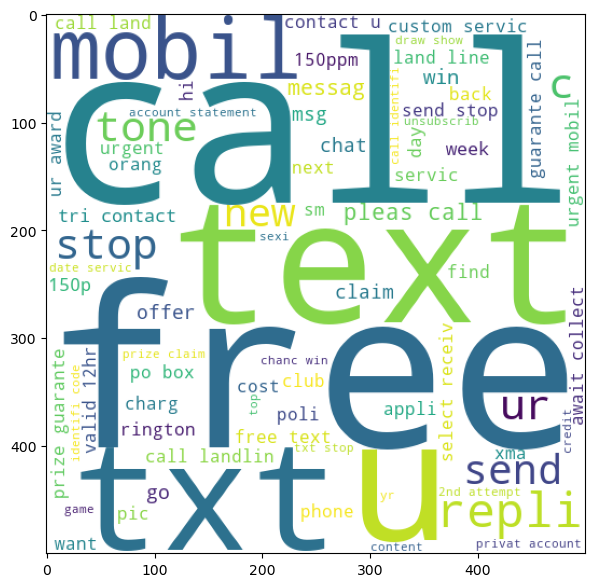

In [ ]:
# Word cloud for spam message
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(15,7))
plt.imshow(spam_wc)

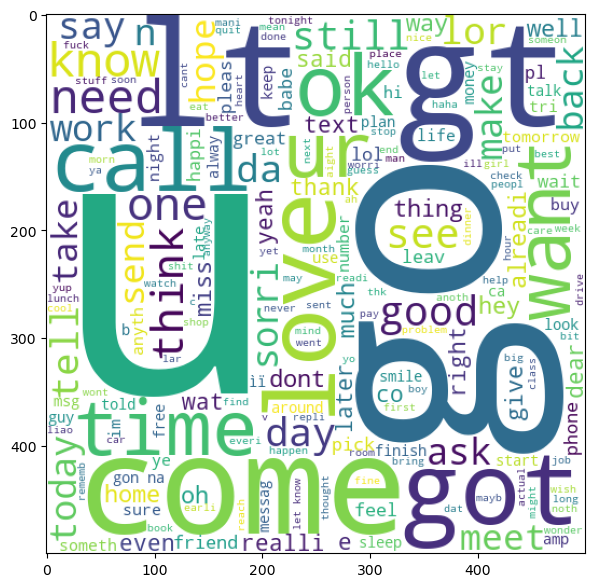

In [ ]:
# word cloud for ham message
spam_wc=wc.generate(df[df['Target']==0]['Transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(15,7))
plt.imshow(spam_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        
len(spam_corpus)
        

9939

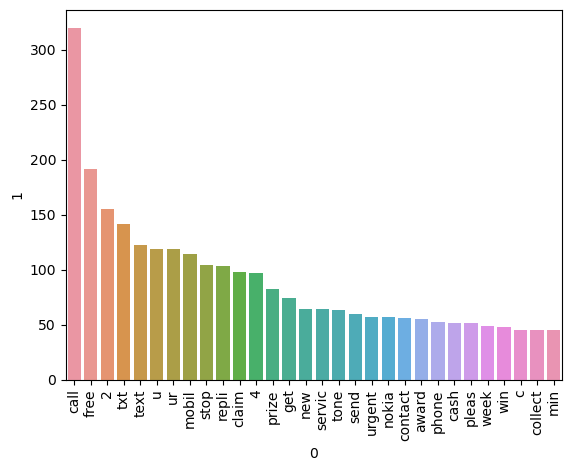

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

###
Here in the above barplot these are the 30 most commom words in spam messages

In [ ]:
ham_corpus=[]
for msg in df[df['Target']==0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
len(ham_corpus)


35404

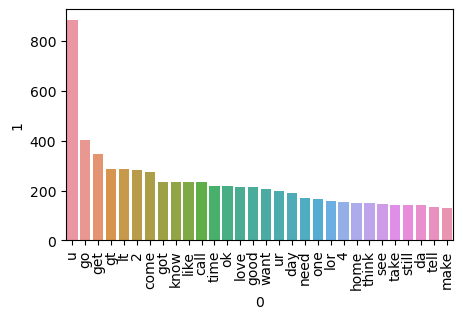

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

###
Here in the above barplot these are the 30 most commom words in ham messages

### Model Building

In [ ]:
#cv=CountVectorizer()
tfid=TfidfVectorizer(max_features=3000)
X=tfid.fit_transform(df['Transformed_Text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)


In [ ]:
y=df['Target'].to_numpy()
y=y.reshape(-1)
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_train=y_train.reshape(-1)

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
# Model training using gnb
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(f"The confusion matrix is \n{confusion_matrix(y_test,y_pred1)}" )
print(f"The accuracy score is {accuracy_score(y_test,y_pred1)}" )
print(f"The precision score is {precision_score(y_test,y_pred1)}" )
print(f"The recall score is {recall_score(y_test,y_pred1)}" )
print(f"The F-1 score is {f1_score(y_test,y_pred1)}" )

The confusion matrix is 
[[769 120]
 [ 24 121]]
The accuracy score is 0.8607350096711799
The precision score is 0.5020746887966805
The recall score is 0.8344827586206897
The F-1 score is 0.6269430051813472


In [ ]:
# Model training using mnb
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(f"The confusion matrix is \n{confusion_matrix(y_test,y_pred2)}" )
print(f"The accuracy score is {accuracy_score(y_test,y_pred2)}" )
print(f"The precision score is {precision_score(y_test,y_pred2)}" )
print(f"The recall score is {recall_score(y_test,y_pred2)}" )
print(f"The F-1 score is {f1_score(y_test,y_pred2)}" )

The confusion matrix is 
[[883   6]
 [ 17 128]]
The accuracy score is 0.9777562862669246
The precision score is 0.9552238805970149
The recall score is 0.8827586206896552
The F-1 score is 0.9175627240143368


In [ ]:
# Model training using bnb
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(f"The confusion matrix is \n{confusion_matrix(y_test,y_pred3)}" )
print(f"The accuracy score is {accuracy_score(y_test,y_pred3)}" )
print(f"The precision score is {precision_score(y_test,y_pred3)}" )
print(f"The recall score is {recall_score(y_test,y_pred3)}" )
print(f"The F-1 score is {f1_score(y_test,y_pred3)}" )

The confusion matrix is 
[[884   5]
 [ 23 122]]
The accuracy score is 0.9729206963249516
The precision score is 0.9606299212598425
The recall score is 0.8413793103448276
The F-1 score is 0.8970588235294117


#### Since our data is imbalanced, we will be considering precision and recall score more than accuracy score to choose best algorithm to fit in our data.

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    return accuracy,precision,recall,f1

In [ ]:
accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision,current_recall,current_f1=train_classifier(clf,
                                                                                  X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1 - ",current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128
Recall -  0.8758620689655172
F1 -  0.9136690647482015
For  KN
Accuracy -  0.9168278529980658
Precision -  1.0
Recall -  0.4068965517241379
F1 -  0.5784313725490197
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
Recall -  0.8137931034482758
F1 -  0.893939393939394
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8347826086956521
Recall -  0.6620689655172414
F1 -  0.7384615384615384
For  LR
Accuracy -  0.9468085106382979
Precision -  0.8688524590163934
Recall -  0.7310344827586207
F1 -  0.7940074906367042
For  RF
Accuracy -  0.971953578336557
Precision -  0.9754098360655737
Recall -  0.8206896551724138
F1 -  0.8913857677902621
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875
Recall -  0.7655172413793103
F1 -  0.8131868131868132
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.8840579710144928
Recall -  0.8413793103448276
F1 -  0.8621908127208481
For  ETC
Accuracy - 

In [ ]:
performance=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,
                         'Precision':precision_scores,'Recall':recall_scores,
                         'F1 Score':f1_scores}).sort_values('Recall',ascending=False)

In [ ]:
performance


,Algorithm,Accuracy,Precision,Recall,F1 Score
0,SVC,0.971954,0.939394,0.855172,0.895307
10,xgb,0.974855,0.968504,0.848276,0.904412
7,BgC,0.961315,0.877698,0.841379,0.859155
8,ETC,0.973888,0.991667,0.820690,0.898113
5,RF,0.970019,0.991379,0.793103,0.881226
6,AdaBoost,0.947776,0.842105,0.772414,0.805755
2,NB,0.961315,0.990654,0.731034,0.841270
4,LR,0.943907,0.865546,0.710345,0.780303
3,DT,0.934236,0.808000,0.696552,0.748148
9,GBDT,0.950677,0.951923,0.682759,0.795181


### Model improvement

In [ ]:
#1.changing the max_feature parameter of tfidf


model_improve=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft':accuracy_scores,
                         'Precision_max_ft':precision_scores,'Recall_max_ft':recall_scores,
                         'F1 Score_max_ft':f1_scores}).sort_values('Recall_max_ft',ascending=False)
#2.Scaling
model_scale=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,
                         'Precision_scaling':precision_scores,'Recall_scaling':recall_scores,
                         'F1 Score_scaling':f1_scores}).sort_values('Recall_scaling',ascending=False)


In [ ]:
merged_df = performance.merge(model_improve, on='Algorithm').merge(model_scale, on='Algorithm')
merged_df

,Algorithm,Accuracy,Precision,Recall,F1 Score,Accuracy_max_ft,Precision_max_ft,Recall_max_ft,F1 Score_max_ft,Accuracy_scaling,Precision_scaling,Recall_scaling,F1 Score_scaling
0,SVC,0.971954,0.939394,0.855172,0.895307,0.970986,0.913669,0.875862,0.894366,0.970986,0.913669,0.875862,0.894366
1,xgb,0.974855,0.968504,0.848276,0.904412,0.968085,0.937500,0.827586,0.879121,0.968085,0.937500,0.827586,0.879121
2,BgC,0.961315,0.877698,0.841379,0.859155,0.962282,0.884058,0.841379,0.862191,0.962282,0.884058,0.841379,0.862191
3,ETC,0.973888,0.991667,0.820690,0.898113,0.977756,0.984127,0.855172,0.915129,0.977756,0.984127,0.855172,0.915129
4,RF,0.970019,0.991379,0.793103,0.881226,0.971954,0.975410,0.820690,0.891386,0.971954,0.975410,0.820690,0.891386
5,AdaBoost,0.947776,0.842105,0.772414,0.805755,0.950677,0.867188,0.765517,0.813187,0.950677,0.867188,0.765517,0.813187
6,NB,0.961315,0.990654,0.731034,0.841270,0.977756,0.955224,0.882759,0.917563,0.977756,0.955224,0.882759,0.917563
7,LR,0.943907,0.865546,0.710345,0.780303,0.962282,0.920635,0.800000,0.856089,0.962282,0.920635,0.800000,0.856089
8,DT,0.934236,0.808000,0.696552,0.748148,0.934236,0.834783,0.662069,0.738462,0.934236,0.834783,0.662069,0.738462
9,GBDT,0.950677,0.951923,0.682759,0.795181,0.946809,0.968750,0.641379,0.771784,0.946809,0.968750,0.641379,0.771784


In [ ]:
#3. voting classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='hard')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [ ]:
y_pred4=voting.predict(X_test)
print("Performance metrics on testing set:")

print(f"The confusion matrix is \n{confusion_matrix(y_test,y_pred4)}" )
print(f"The accuracy score is {accuracy_score(y_test,y_pred4)}" )
print(f"The precision score is {precision_score(y_test,y_pred4)}" )
print(f"The recall score is {recall_score(y_test,y_pred4)}" )
print(f"The F-1 score is {f1_score(y_test,y_pred4)}" )

Performance metrics on testing set:
The confusion matrix is 
[[886   3]
 [ 15 130]]
The accuracy score is 0.9825918762088974
The precision score is 0.9774436090225563
The recall score is 0.896551724137931
The F-1 score is 0.935251798561151


In [ ]:
y_pred_train = voting.predict(X_train)
print("Performance metrics on training set:")

print(f"The confusion matrix is \n{confusion_matrix(y_train,y_pred_train)}" )
print(f"The accuracy score is {accuracy_score(y_train,y_pred_train)}" )
print(f"The precision score is {precision_score(y_train,y_pred_train)}" )
print(f"The recall score is {recall_score(y_train,y_pred_train)}" )
print(f"The F-1 score is {f1_score(y_train,y_pred_train)}" )

Performance metrics on training set:
The confusion matrix is 
[[3625    2]
 [  40  468]]
The accuracy score is 0.9898428053204353
The precision score is 0.9957446808510638
The recall score is 0.9212598425196851
The F-1 score is 0.9570552147239264


### Here after using voting classifier we got the best model with highest accuracy,precision,recall score and f-1 score in both training and testing datasets

In [ ]:
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))